# iDEALParking
## ETL

### Reading data

In [80]:
import pandas as pd  
import numpy as np
import math
import ast
import re

In [81]:
data = pd.read_csv('idealistaAPI-2018.csv')

### Distance to the center
Before cleaning data we have to delete the distance center of Idealista and compute our distance center (a matter of indexes)

In [82]:
def coordinates_to_distance(latitude,longitude):
    latitude_center = math.radians(41.3851001)
    longitude_center = math.radians(2.1736845)
    latitude_1 = math.radians(latitude)
    longitude_1 = math.radians(longitude)
    R_earth = 6371000.0
    inc_long = longitude_1-longitude_center
    inc_lat = latitude_1-latitude_center
    a = (math.sin(inc_lat/2))**2 + math.cos(latitude_1)*math.cos(latitude_center)*(math.sin(inc_long/2))**2
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = round(R_earth*c) 
    return d
new_distance = np.zeros(len(data["latitude"]))
for i in range(0,len(data["latitude"])):
    new_distance[i] = coordinates_to_distance(data["latitude"][i],data["longitude"][i])
data["distance"] = new_distance
data = data.drop("latitude",1)
data = data.drop("longitude",1)

### Only in Barcelona

In [83]:
data = data[data['municipality'] == 'Barcelona']
data

,Unnamed: 0,address,country,detailedType.subTypology,detailedType.typology,distance,district,exterior,externalReference,floor,...,priceByArea,propertyCode,propertyType,province,showAddress,suggestedTexts.subtitle,suggestedTexts.title,thumbnail,url,features
0,0,"calle del comte d'urgell, 234",es,NaN,garage,2130.0,Eixample,False,PLAZA 110 SOTANO B,NaN,...,NaN,38683271,garage,Barcelona,True,"L'Antiga Esquerra de l'Eixample, Barcelona","Garaje en calle del comte d'urgell, 234",https://img3.idealista.com/blur/WEB_LISTING/0/...,https://www.idealista.com/inmueble/38683271/,['Cubierta']
1,1,"calle de tarragona, 149 -157",es,NaN,garage,2522.0,Sants-Montjuïc,False,PLAZA 66 SOTANO B,NaN,...,NaN,38681477,garage,Barcelona,True,"Hostafrancs, Barcelona","Garaje en calle de tarragona, 149 -157",https://img3.idealista.com/blur/WEB_LISTING/0/...,https://www.idealista.com/inmueble/38681477/,['Cubierta']
2,2,"calle de Rocafort, 116",es,NaN,garage,1922.0,Eixample,False,PLAZA MOTO SOTANO D,NaN,...,NaN,82918245,garage,Barcelona,True,"La Nova Esquerra de l'Eixample, Barcelona","Garaje en calle de Rocafort, 116",https://img3.idealista.com/blur/WEB_LISTING/0/...,https://www.idealista.com/inmueble/82918245/,['Cubierta']
3,3,mallorca,es,sedanCar,garage,2031.0,Eixample,False,02PLZGJEMALLORCA,NaN,...,12.0,32954188,garage,Barcelona,False,"La Nova Esquerra de l'Eixample, Barcelona",Garaje en mallorca,https://img3.idealista.com/blur/WEB_LISTING/0/...,https://www.idealista.com/inmueble/32954188/,"['Plaza para coche grande', '9 m²', 'Cubierta'..."
4,4,"rambla de Volart, 12",es,sedanCar,garage,3468.0,Horta Guinardó,False,NaN,NaN,...,8.0,82915795,garage,Barcelona,True,"El Guinardó, Barcelona","Garaje en rambla de Volart, 12",https://img3.idealista.com/blur/WEB_LISTING/0/...,https://www.idealista.com/inmueble/82915795/,[]
6,6,"VALENCIA, 500",es,carAndMotorcycle,garage,2243.0,Eixample,False,NaN,NaN,...,10.0,82914626,garage,Barcelona,True,"La Sagrada Família, Barcelona","Garaje en VALENCIA, 500",https://img3.idealista.com/blur/WEB_LISTING/0/...,https://www.idealista.com/inmueble/82914626/,"['Plaza para coche y moto', '13 m²', 'Cubierta..."
7,7,"avenida Diagonal, 429",es,sedanCar,garage,2047.0,Eixample,False,NaN,NaN,...,NaN,82914148,garage,Barcelona,True,"L'Antiga Esquerra de l'Eixample, Barcelona","Garaje en avenida Diagonal, 429",https://img3.idealista.com/blur/WEB_LISTING/0/...,https://www.idealista.com/inmueble/82914148/,"['Plaza para coche grande', 'Cubierta', 'Con a..."
8,8,"calle Sepúlveda, 104",es,compactCar,garage,1436.0,Eixample,False,NaN,NaN,...,13.0,82913638,garage,Barcelona,True,"Sant Antoni, Barcelona","Garaje en calle Sepúlveda, 104",https://img3.idealista.com/blur/WEB_LISTING/90...,https://www.idealista.com/inmueble/82913638/,[]
9,9,gran via de les corts catalanes s/n,es,sedanCar,garage,2267.0,Eixample,False,NaN,NaN,...,NaN,33767792,garage,Barcelona,True,"Sant Antoni, Barcelona",Garaje en gran via de les corts catalanes s/n,https://img3.idealista.com/blur/WEB_LISTING/0/...,https://www.idealista.com/inmueble/33767792/,"['Plaza para coche grande', 'Cubierta', ' Puer..."
11,11,"calle de Roger de Flor, 187",es,compactCar,garage,1709.0,Eixample,False,NaN,NaN,...,NaN,39586842,garage,Barcelona,True,"La Dreta de l'Eixample, Barcelona","Garaje en calle de Roger de Flor, 187",https://img3.idealista.com/blur/WEB_LISTING/0/...,https://www.idealista.com/inmueble/39586842/,[]


### Dropping data

In [84]:
data = data.drop("detailedType.typology",1)
data = data.drop("Unnamed: 0",1)
data = data.drop("country",1)
data = data.drop("has360",1)
data = data.drop("has3DTour",1)
data = data.drop("hasVideo",1)
data = data.drop("externalReference",1)
data = data.drop("operation",1)
data = data.drop("propertyCode",1)
data = data.drop("propertyType",1)
data = data.drop("thumbnail",1)
data = data.drop("newDevelopmentFinished",1)
data = data.drop("url",1)
data = data.drop("province",1)
data = data.drop("showAddress",1)
data = data.drop("address",1)
data = data.drop("exterior",1)
data = data.drop("suggestedTexts.title",1)
data = data.drop("suggestedTexts.subtitle",1)
# data = data.drop("priceByArea",1)
data = data.drop("floor",1)
data = data.drop("municipality",1)
data = data.drop("numPhotos",1)

In [85]:
np.unique(data['neighborhood']).shape

(65,)

### Feature extraction

##### Function for distance to center

In [86]:
def coordinates_to_distance(latitude,longitude):
    latitude_center = math.radians(41.3851001)
    longitude_center = math.radians(2.1736845)
    latitude_1 = math.radians(latitude)
    longitude_1 = math.radians(longitude)
    R_earth = 6371000.0
    inc_long = longitude_1-longitude_center
    inc_lat = latitude_1-latitude_center
    a = (math.sin(inc_lat/2))**2 + math.cos(latitude_1)*math.cos(latitude_center)*(math.sin(inc_long/2))**2
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    d = R_earth*c
    return d

##### Converting features

In [87]:
data['price'].max()

15000.0

In [88]:
# Renaming all features
data = data.rename(columns={"detailedType.subTypology":"Type", "neighborhood":"Neighborhood", "distance":"Distance" })
data = data.rename(columns={"newDevelopment":"NewDevelopment", "hasPlan":"HasPlan" })
data = data.rename(columns={"hasLift":"HasLift", "district":"District"})

# Keeping data

data_k = data
# District
data['District'] = (data['District'].astype(str))
aux = data.copy()
#We order the number of districst correctly, instead of alphabetically
# district = np.unique(data['District'])
# for i in range(0,len(district)):
#     aux[(data['District'] == district[i])] = i+1
aux[data['District']=='Ciutat Vella'] = 1
aux[data['District']=='Eixample'] = 2
aux[data['District']=='Sants-Montjuïc'] = 3
aux[data['District']=='Les Corts'] = 4
aux[data['District']=='Sarrià-Sant Gervasi'] = 5
aux[data['District']=='Gràcia'] = 6
aux[data['District']=='Horta Guinardó'] = 7
aux[data['District']=='Nou Barris'] = 8
aux[data['District']=='Sant Andreu'] = 9
aux[data['District']=='Sant Martí'] = 10
data['District'] = aux['District']

# Neighborhood
data['Neighborhood'] = (data['Neighborhood'].astype(str))
aux = data.copy()
#We order the number of neighborhoods correctly, instead of alphabetically
# neighborhood = np.unique(data['Neighborhood'])
# for i in range(0,len(neighborhood)):
#     aux[(data['Neighborhood'] == neighborhood[i])] = i+1 
aux[data['Neighborhood']=='El Raval'] = 1
aux[data['Neighborhood']=='El Gòtic'] = 2
aux[data['Neighborhood']=='La Barceloneta'] = 3
aux[data['Neighborhood']=='Sant Pere - Santa Caterina i la Ribera'] = 4
aux[data['Neighborhood']=='El Fort Pienc'] = 5
aux[data['Neighborhood']=='La Sagrada Família'] = 6
aux[data['Neighborhood']=='La Dreta de l\'Eixample'] = 7
aux[data['Neighborhood']=='L\'Antiga Esquerra de l\'Eixample'] = 8
aux[data['Neighborhood']=='La Nova Esquerra de l\'Eixample'] = 9
aux[data['Neighborhood']=='Sant Antoni'] = 10
aux[data['Neighborhood']=='El Poble Sec - Parc de Montjuïc'] = 11
aux[data['Neighborhood']=='La Marina del Prat Vermell'] = 12
aux[data['Neighborhood']=='La Marina del Port'] = 13
aux[data['Neighborhood']=='La Font de la Guatlla'] = 14
aux[data['Neighborhood']=='Hostafrancs'] = 15
aux[data['Neighborhood']=='La Bordeta'] = 16
aux[data['Neighborhood']=='Sants - Badal'] = 17
aux[data['Neighborhood']=='Sants'] = 18 
aux[data['Neighborhood']=='Les Corts'] = 19
aux[data['Neighborhood']=='La Maternitat i Sant Ramon'] = 20
aux[data['Neighborhood']=='Pedralbes'] = 21
aux[data['Neighborhood']=='Vallvidreta, Tibidabo i les Planes'] = 22 #Wasn't in our data
aux[data['Neighborhood']=='Sarrià'] = 23
aux[data['Neighborhood']=='Les Tres Torres'] = 24
aux[data['Neighborhood']=='Sant Gervasi - La Bonanova'] = 25
aux[data['Neighborhood']=='Sant Gervasi - Galvany'] = 26
aux[data['Neighborhood']=='El Putxet i el Farró'] = 27
aux[data['Neighborhood']=='Vallcarca i els Penitents'] = 28
aux[data['Neighborhood']=='El Coll'] = 29
aux[data['Neighborhood']=='La Salut'] = 30
aux[data['Neighborhood']=='Vila de Gràcia'] = 31
aux[data['Neighborhood']=='El Camp d\'En Grassot i Gràcia Nova'] = 32
aux[data['Neighborhood']=='El Baix Guinardó'] = 33
aux[data['Neighborhood']=='Can Baró'] = 34
aux[data['Neighborhood']=='El Guinardó'] = 35
aux[data['Neighborhood']=='La Font d\'En Fargues'] = 36
aux[data['Neighborhood']=='El Carmel'] = 37
aux[data['Neighborhood']=='La Teixonera'] = 38
aux[data['Neighborhood']=='Sant Genís Dels Agudells - Montbau'] = 39 #It is together with number 40 
aux[data['Neighborhood']=='La Vall d\'Hebron - La Clota'] = 41 #It is together with number 42
aux[data['Neighborhood']=='Horta'] = 43
aux[data['Neighborhood']=='Vilapicina i la Torre Llobeta'] = 44
aux[data['Neighborhood']=='Porta'] = 45
aux[data['Neighborhood']=='Can Peguera - El Turó de la Peira'] = 46 #It is together with number 47
aux[data['Neighborhood']=='La Guineueta'] = 48
aux[data['Neighborhood']=='Les Roquetes - Canyelles'] = 49 #It is together with number 50
aux[data['Neighborhood']=='Verdun'] = 51
aux[data['Neighborhood']=='La Prosperitat'] = 52
aux[data['Neighborhood']=='La Trinitat Nova'] = 53 #Wasn't in our data
aux[data['Neighborhood']=='Ciutat Meridiana - Torre Baró - Vallbona'] = 54 #It is together with numbers 55 and 56
aux[data['Neighborhood']=='La Trinitat Vella'] = 57
aux[data['Neighborhood']=='Baró de Viver'] = 58 
aux[data['Neighborhood']=='El Bon Pastor'] = 59
aux[data['Neighborhood']=='Sant Andreu'] = 60
aux[data['Neighborhood']=='La Sagrera'] = 61
aux[data['Neighborhood']=='El Congrés i els Indians'] = 62
aux[data['Neighborhood']=='Navas'] = 63
aux[data['Neighborhood']=='El Camp de l\'Arpa del Clot'] = 64
aux[data['Neighborhood']=='El Clot'] = 65
aux[data['Neighborhood']=='El Parc i la Llacuna del Poblenou'] = 66
aux[data['Neighborhood']=='La Vila Olímpica del Poblenou'] = 67
aux[data['Neighborhood']=='El Poblenou'] = 68
aux[data['Neighborhood']=='Diagonal Mar i el Front Marítim del Poblenou'] = 69
aux[data['Neighborhood']=='El Besòs'] = 70 #It is named "El Besòs i el Maresme" in wikipedia
aux[data['Neighborhood']=='Provençals del Poblenou'] = 71
aux[data['Neighborhood']=='Sant Martí de Provençals'] = 72
aux[data['Neighborhood']=='La Verneda i la Pau'] = 73
data['Neighborhood'] = aux['Neighborhood']

# Delete the outlier before the dropna
data = data.drop([data[data['price'] == 15000.0].index[0]],axis=0)
# data[data['price'] == 15000.0].index[0]
# data = data.drop(data.index)
# data[data['price'] < 30].count()

# Type
data = data.dropna()
data['Type'] = (data['Type'].astype(str))
aux = data.copy()
type_ = np.unique(data['Type'])
for i in range(0,len(type_)):
    aux[(data['Type'] == type_[i])] = i+1 
data['Type'] = aux['Type']

# hasLift
dummies = [1 if x==True else  0 for x in data["HasLift"]]
data["HasLift"] = dummies

# hasPlan
dummies = [1 if x==True else  0 for x in data["HasPlan"]]
data["HasPlan"] = dummies

# newDevelopment
dummies = [1 if x==True else  0 for x in data["NewDevelopment"]]
data["NewDevelopment"] = dummies

# Reordering index
data = data.reset_index()
data = data.drop("index",1)
data

,Type,Distance,District,HasLift,HasPlan,Neighborhood,NewDevelopment,price,priceByArea,features
0,4,2031.0,2,1,0,9,0,109.0,12.0,"['Plaza para coche grande', '9 m²', 'Cubierta'..."
1,4,3468.0,7,1,0,35,0,100.0,8.0,[]
2,1,2243.0,2,0,0,6,0,130.0,10.0,"['Plaza para coche y moto', '13 m²', 'Cubierta..."
3,2,1436.0,2,0,0,10,0,100.0,13.0,[]
4,4,3082.0,10,0,0,64,0,105.0,9.0,[]
5,4,3966.0,9,0,0,63,0,85.0,9.0,"['Plaza para coche grande', '9,5 m²', ' Puerta..."
6,4,4099.0,5,1,0,23,0,110.0,10.0,"['Plaza para coche grande', '11 m²', 'Cubierta..."
7,2,4248.0,9,0,1,62,0,100.0,9.0,"['Plaza para coche pequeño', '10,6 m²', 'Cubie..."
8,4,4055.0,4,1,0,20,0,120.0,11.0,"['Plaza para coche grande', '11 m²', 'Cubierta..."
9,4,3589.0,10,1,1,71,0,120.0,10.0,"['Plaza para coche grande', '12 m²', 'Cubierta..."


In [89]:
data['price'].max()

290.0

##### New features from scrapping convertion and extraction

In [90]:
array_new_features = data['features']
type2 = []
size = []
cover = []
elevator = []
automaticDoor = []
alarm = []
securityCam = []
security = []
pattern1 = r'^(Plazapara)'
pattern2 = r'^([1-9])'
pattern3 = r'^(Cubierta)'
pattern4 = r'^(Con)'
pattern5 = r'^(Puerta)'
pattern6 = r'^(Alarma)'
pattern7 = r'^(Cámaras)'
pattern8 = r'^(Personal)'

for i in range(0,len(array_new_features)):
    ex = ast.literal_eval(array_new_features[i])
    comp1 = 0
    comp2 = 0
    comp3 = 0
    comp4 = 0
    comp5 = 0
    comp6 = 0
    comp7 = 0
    comp8 = 0
    if not ex:
        type2.append(np.nan)
        size.append(np.nan)
        cover.append("Sincubierta")
        elevator.append("Sinascensor")
        automaticDoor.append("Sinpuertaautomáticadegaraje")
        alarm.append("Sinalarma")
        securityCam.append("Sincámaradeseguridad")
        security.append("Sinpersonaldeseguridad")
    else:
        for j in range(0,len(ex)):
            aux = ex[j].replace("m²","")
            aux = aux.replace(" ","")
            if (bool(re.match(pattern1, aux)) == True):
                type2.append(aux)
                comp1 = 1
            if (bool(re.match(pattern2, aux)) == True):
                size.append(aux)
                comp2 = 1
            if (bool(re.match(pattern3, aux)) == True):
                cover.append(aux)
                comp3 = 1
            if (bool(re.match(pattern4, aux)) == True):
                elevator.append(aux)
                comp4 = 1
            if (bool(re.match(pattern5, aux)) == True):
                automaticDoor.append(aux)
                comp5 = 1
            if (bool(re.match(pattern6, aux)) == True):
                alarm.append(aux)
                comp6 = 1
            if (bool(re.match(pattern7, aux)) == True):
                securityCam.append(aux)
                comp7 = 1
            if (bool(re.match(pattern8, aux)) == True):
                security.append(aux)
                comp8 = 1
            if j == len(ex)-1:
                if comp1 == 0:
                    type2.append(np.nan)
                if comp2 == 0:
                    size.append(np.nan)
                if comp3 == 0:
                    cover.append("Sincubierta")
                if comp4 == 0:
                    elevator.append("Sinascensor")
                if comp5 == 0:
                    automaticDoor.append("Sinpuertaautomáticadegaraje")
                if comp6 == 0:
                    alarm.append("Sinalarma")
                if comp7 == 0:
                    securityCam.append("Sincámaradeseguridad")
                if comp8 == 0:
                    security.append("Sinpersonaldeseguridad")


In [91]:
## Comprobation
print(len(type2))
print(len(size))
print(len(cover))
print(len(elevator))
print(len(automaticDoor))
print(len(alarm))
print(len(securityCam))
print(len(security))

544
544
544
544
544
544
544
544


In [92]:
y = data["price"]
# data = data.drop("price",1)
data = data.drop("features",1)

In [93]:
# Type2 is the same of type, so we don't need to include it. 
# HasLift is not the same of elevator in some cases so we are going to merge both of them.

dummies_cover = [1 if x=='Cubierta' else  0 for x in cover]  # 1 if there is cover, 0 otherwise
data['Cover'] = dummies_cover

dummies_elevator = [1 if x=='Conascensor' else  0 for x in elevator]  # 1 if there is lift, 0 otherwise
lift = data['HasLift'].values
merged_lift = np.array(dummies_elevator)+lift
dummies_lift = [1 if x>0 else 0 for x in merged_lift]
# data = data.drop("HasLift",1)
data['HasLift'] = dummies_lift

data['Size'] = size

dummies_autoDoor = [1 if x=='Puertaautomáticadegaraje' else  0 for x in automaticDoor]  # 1 if there is automatic door, 0 otherwise
data['AutomaticDoor'] = dummies_autoDoor

dummies_alarm = [1 if x=='Alarma' else  0 for x in alarm]  # 1 if there is alarm, 0 otherwise
data['Alarm'] = dummies_alarm

dummies_secCam = [1 if x=='Cámarasdeseguridad' else  0 for x in securityCam]  # 1 if there is security camera, 0 otherwise
data['SecurityCam'] = dummies_secCam

dummies_secPer = [1 if x=='Personaldeseguridad' else  0 for x in security]  # 1 if there is security guard, 0 otherwise
data['SecurityPer'] = dummies_secPer

data

,Type,Distance,District,HasLift,HasPlan,Neighborhood,NewDevelopment,price,priceByArea,Cover,Size,AutomaticDoor,Alarm,SecurityCam,SecurityPer
0,4,2031.0,2,1,0,9,0,109.0,12.0,1,9,1,0,0,0
1,4,3468.0,7,1,0,35,0,100.0,8.0,0,NaN,0,0,0,0
2,1,2243.0,2,0,0,6,0,130.0,10.0,1,13,1,0,0,0
3,2,1436.0,2,0,0,10,0,100.0,13.0,0,NaN,0,0,0,0
4,4,3082.0,10,0,0,64,0,105.0,9.0,0,NaN,0,0,0,0
5,4,3966.0,9,0,0,63,0,85.0,9.0,0,"9,5",1,0,0,0
6,4,4099.0,5,1,0,23,0,110.0,10.0,1,11,1,1,1,1
7,2,4248.0,9,0,1,62,0,100.0,9.0,1,"10,6",1,0,0,0
8,4,4055.0,4,1,0,20,0,120.0,11.0,1,11,1,1,0,0
9,4,3589.0,10,1,1,71,0,120.0,10.0,1,12,1,0,0,0


In [94]:
price = data['price'].values
pricebyarea = data['priceByArea'].values
calculated_size = np.round(price/pricebyarea,1)
original_size = data['Size']
original_size = [str(s).replace(',', '.') for s in original_size]
original_size = np.asarray(original_size,dtype=float)
idx = np.isnan(original_size)

merged_size = np.round(original_size,1)
merged_size[idx] = calculated_size[idx]
merged_size

y = data["price"]
data = data.drop("price",1)
data = data.drop("priceByArea",1)
data = data.drop("Size",1)
data['Size'] = np.array(merged_size)

data

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,Type,Distance,District,HasLift,HasPlan,Neighborhood,NewDevelopment,Cover,AutomaticDoor,Alarm,SecurityCam,SecurityPer,Size
0,4,2031.0,2,1,0,9,0,1,1,0,0,0,9.0
1,4,3468.0,7,1,0,35,0,0,0,0,0,0,12.5
2,1,2243.0,2,0,0,6,0,1,1,0,0,0,13.0
3,2,1436.0,2,0,0,10,0,0,0,0,0,0,7.7
4,4,3082.0,10,0,0,64,0,0,0,0,0,0,11.7
5,4,3966.0,9,0,0,63,0,0,1,0,0,0,9.5
6,4,4099.0,5,1,0,23,0,1,1,1,1,1,11.0
7,2,4248.0,9,0,1,62,0,1,1,0,0,0,10.6
8,4,4055.0,4,1,0,20,0,1,1,1,0,0,11.0
9,4,3589.0,10,1,1,71,0,1,1,0,0,0,12.0


In [95]:
## Delete the samples where we obtain an infinite size (two times because there are two inf)

data = data.drop([data[data['Size'] == np.inf].index[0]],axis=0)
data = data.reset_index()
data = data.drop([data[data['Size'] == np.inf].index[0]],axis=0)
data = data.reset_index()
# data = data.drop("index",axis=0)
data

,level_0,index,Type,Distance,District,HasLift,HasPlan,Neighborhood,NewDevelopment,Cover,AutomaticDoor,Alarm,SecurityCam,SecurityPer,Size
0,0,0,4,2031.0,2,1,0,9,0,1,1,0,0,0,9.0
1,1,1,4,3468.0,7,1,0,35,0,0,0,0,0,0,12.5
2,2,2,1,2243.0,2,0,0,6,0,1,1,0,0,0,13.0
3,3,3,2,1436.0,2,0,0,10,0,0,0,0,0,0,7.7
4,4,4,4,3082.0,10,0,0,64,0,0,0,0,0,0,11.7
5,5,5,4,3966.0,9,0,0,63,0,0,1,0,0,0,9.5
6,6,6,4,4099.0,5,1,0,23,0,1,1,1,1,1,11.0
7,7,7,2,4248.0,9,0,1,62,0,1,1,0,0,0,10.6
8,8,8,4,4055.0,4,1,0,20,0,1,1,1,0,0,11.0
9,9,9,4,3589.0,10,1,1,71,0,1,1,0,0,0,12.0


In [298]:
data['Size'].max()  ## Es un poco raro este valor

80.0

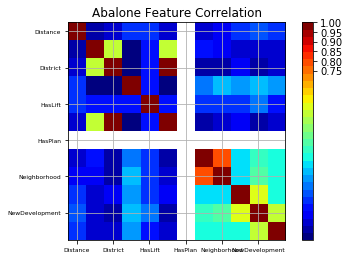

In [15]:
def correlation_matrix(df):
    from matplotlib import cm as cm
    import matplotlib.pyplot as plt

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Type','Distance','District','HasLift','HasPlan','Neighborhood','NewDevelopment']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(data)

### Extracting X and y and saving it

In [299]:
X = np.array(data.values).astype(float)

## Saving it
np.save('X',X)
np.save('y',y)

### Showing data

In [32]:
y[data["District"]=="Eixample"].mean()
district = np.unique(data['District'])
solution = []
for i in range(0,len(district)):
    aux = []
    aux.append(district[i])
    aux.append(y[(data['District'] == district[i])].mean())
    solution.append(aux)
    
# np.save(solution)
solution

[['Ciutat Vella', 104.52],
 ['Eixample', 98.39276485788113],
 ['Gràcia', 94.07035175879398],
 ['Horta Guinardó', 85.87209302325581],
 ['Les Corts', 99.98843930635839],
 ['Nou Barris', 79.8225806451613],
 ['Sant Andreu', 78.51572327044025],
 ['Sant Martí', 151.04109589041096],
 ['Sants-Montjuïc', 87.13304721030043],
 ['Sarrià-Sant Gervasi', 139.0483870967742]]

### First approach: mean along districts

In [33]:
# data

In [36]:
#We add the predicted value to the dataframe 
predicted = []

# data = data.drop("Predicted price by district",1)
district = np.unique(data['District'])
    
for row in data['District']:
    for i in range (0,len(district)):
        if row == district[i]:
            predicted.append(solution[i][1])

data["Predicted price by district"] = predicted



# data


##### We can also add a column with the mean along neighborhoods

In [29]:
neighborhood = np.unique(data['Neighborhood'])
solution2 = []
for i in range(0,len(neighborhood)):
    aux = []
    aux.append(neighborhood[i])
    aux.append(y[(data['Neighborhood'] == neighborhood[i])].mean())
    solution2.append(aux)
    
# np.save(solution)
solution2

[['Baró de Viver', 80.0],
 ['Can Baró', 105.0],
 ['Can Peguera - El Turó de la Peira', 67.5],
 ['Ciutat Meridiana - Torre Baró - Vallbona', 100.0],
 ['Diagonal Mar i el Front Marítim del Poblenou', 78.5],
 ['El Baix Guinardó', 98.66666666666667],
 ['El Besòs', 5074.666666666667],
 ['El Bon Pastor', 62.333333333333336],
 ["El Camp d'En Grassot i Gràcia Nova", 97.8],
 ["El Camp de l'Arpa del Clot", 87.94736842105263],
 ['El Carmel', 85.2],
 ['El Clot', 79.11538461538461],
 ['El Coll', 60.916666666666664],
 ['El Congrés i els Indians', 77.11764705882354],
 ['El Fort Pienc', 95.0],
 ['El Guinardó', 86.05263157894737],
 ['El Gòtic', 108.89473684210526],
 ['El Parc i la Llacuna del Poblenou', 78.89473684210526],
 ['El Poble Sec - Parc de Montjuïc', 75.38095238095238],
 ['El Poblenou', 83.26666666666667],
 ['El Putxet i el Farró', 95.09859154929578],
 ['El Raval', 100.52380952380952],
 ['Horta', 66.0],
 ['Hostafrancs', 97.50847457627118],
 ["L'Antiga Esquerra de l'Eixample", 116.9733333333333

In [37]:
#We add the predicted value to the dataframe 
predicted = []

# data = data.drop("Predicted price by neighborhood",1)
neighborhood = np.unique(data['Neighborhood'])
    
for row in data['Neighborhood']:
    for i in range (0,len(neighborhood)):
        if row == neighborhood[i]:
            predicted.append(solution2[i][1])

data["Predicted price by neighborhood"] = predicted

data

,Type,Distance,District,HasLift,HasPlan,Neighborhood,NewDevelopment,NumPhotos,price,Predicted price by district,Predicted price by neighborhood
0,NaN,2106,Eixample,False,False,L'Antiga Esquerra de l'Eixample,False,8,142.0,98.392765,116.973333
1,NaN,2499,Sants-Montjuïc,False,False,Hostafrancs,False,13,150.0,87.133047,97.508475
2,NaN,1899,Eixample,False,False,La Nova Esquerra de l'Eixample,False,2,38.0,98.392765,90.576000
3,sedanCar,2007,Eixample,True,False,La Nova Esquerra de l'Eixample,False,9,109.0,98.392765,90.576000
4,sedanCar,3470,Horta Guinardó,True,False,El Guinardó,False,1,100.0,85.872093,86.052632
6,carAndMotorcycle,2248,Eixample,False,False,La Sagrada Família,False,4,130.0,98.392765,95.328358
7,sedanCar,2026,Eixample,True,False,L'Antiga Esquerra de l'Eixample,False,3,120.0,98.392765,116.973333
8,compactCar,1414,Eixample,False,False,Sant Antoni,False,4,100.0,98.392765,89.655556
9,sedanCar,2246,Eixample,False,False,Sant Antoni,False,3,80.0,98.392765,89.655556
11,compactCar,1705,Eixample,True,False,La Dreta de l'Eixample,False,3,90.0,98.392765,109.656977
